In [1]:
# dataset : # https://data.worldbank.org/indicator/EN.ATM.CO2E.PC

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.metrics as skmet
import sklearn.preprocessing as pp
import scipy.optimize as opt
import errors

In [3]:
def import_data(path):
    """
    Function to read the world bank data using a path.
    Returns:
    - Two data frames - original and transposed data
    """
    df = pd.read_csv(path, skiprows=4)
    dfT = pd.read_csv(path, skiprows=4).set_index(['Country Name']).T
    return df, dfT

In [4]:
df, dfT = import_data('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_6299644.csv')

In [5]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,591680.972,576265.992,580219.242,590905.482,598720.9575,610723.50,544952.503,NaN,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,9281.340,10057.590,9294.930,10022.780,10972.3800,11238.83,8709.470,NaN,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,196343.630,194363.640,201399.220,200550.900,210618.8900,222990.35,215915.610,NaN,NaN,NaN
4,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,29610.500,31648.900,29520.700,25064.800,23637.4000,24382.90,19814.500,NaN,NaN,NaN


In [15]:
def filter_yearly_data(data_frame):
    """
    This function filters the DataFrame to include only data within the specified range of years.
    
    Args:
    - data_frame (DataFrame): The input DataFrame containing data for various years.
    
    Returns:
    - DataFrame: A subset of the input DataFrame containing data for the specified range of years.
    """
    selected_years = [str(year) for year in range(2000, 2020 + 1)]
    selected_columns = ['Country Name', 'Indicator Name'] + selected_years
    filtered_data = data_frame[selected_columns]
    return filtered_data

data = filter_yearly_data(df)

In [16]:
data = data.dropna()

In [17]:
data.head()

,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Africa Eastern and Southern,CO2 emissions (kt),357967.510652,395061.523617,406488.162257,428637.779164,459742.334363,460840.910225,467829.222212,488797.648679,...,525337.889289,546775.865,568547.519,591680.972,576265.992,580219.242,590905.482,598720.9575,610723.50,544952.503
2,Afghanistan,CO2 emissions (kt),1078.120000,1088.638000,1403.030000,1653.207000,1292.307000,1961.711000,2283.680000,2847.810000,...,11961.890000,10208.130,9402.050,9281.340,10057.590,9294.930,10022.780,10972.3800,11238.83,8709.470
3,Africa Western and Central,CO2 emissions (kt),140653.453000,147879.420000,138656.590000,148185.467000,149751.265000,152041.539000,144266.808000,139839.036000,...,165498.494900,170350.670,186486.660,196343.630,194363.640,201399.220,200550.900,210618.8900,222990.35,215915.610
4,Angola,CO2 emissions (kt),16204.160000,15955.900000,15689.500000,16764.800000,17453.600000,15811.200000,16558.600000,16966.400000,...,23865.800000,23868.000,26958.700,29610.500,31648.900,29520.700,25064.800,23637.4000,24382.90,19814.500
5,Albania,CO2 emissions (kt),3186.540000,3234.200000,3761.900000,4137.400000,4322.300000,4095.900000,4081.800000,4258.400000,...,5136.700000,4541.800,4795.400,5188.000,4797.000,4573.200,5403.700,5316.1000,4993.30,4383.200


In [19]:
datax = data[["Country Name", "2020"]].copy()
datax.head()

,Country Name,2020
1,Africa Eastern and Southern,544952.503
2,Afghanistan,8709.470
3,Africa Western and Central,215915.610
4,Angola,19814.500
5,Albania,4383.200


In [36]:
def percentage_change(data, data2):
    """
    Calculate the percentage change between two specified years.
    
    Args:
    - data 1: The original DataFrame containing data for the initial year.
    - data 2: The DataFrame containing data for the final year.

    Returns:
    - DataFrame: The DataFrame with an additional 'Change' column.
    """
    percentage_change = 100.0 * (data["2020"] - data["2000"]) / data["2000"]
    data2 = data2.assign(Change=percentage_change.replace([np.inf, -np.inf], np.nan))
    return data2

datax = percentage_change(data, datax)

In [40]:
datax = datax.dropna()

In [41]:
datax.describe()

,2020,Change
count,2.380000e+02,238.000000
mean,1.304739e+06,85.316472
std,4.234407e+06,175.690417
min,6.600000e+00,-52.954545
25%,4.421875e+03,-0.437059
50%,2.819615e+04,52.053593
75%,2.807710e+05,105.611880
max,3.356643e+07,2023.744560


In [43]:
def drop_outliers(data_frame, column_names):
    """
    Drop outliers from specified columns in the DataFrame.

    Args:
    - data_frame (DataFrame): The input DataFrame.
    - column_names (list): List of column names to consider for outlier removal.

    Returns:
    - DataFrame: The DataFrame with outliers removed.
    """
    Q1 = data_frame[column_names].quantile(0.25)
    Q3 = data_frame[column_names].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = data_frame[~((data_frame[column_names] < lower_bound) | (data_frame[column_names] > upper_bound)).any(axis=1)]

    return cleaned_data

datax = drop_outliers(datax, ["2020", "Change"])

In [44]:
datax.describe()

,2020,Change
count,180.000000,180.000000
mean,86257.627392,48.858612
std,148016.831314,69.992628
min,6.600000,-52.954545
25%,2389.300000,-5.857991
50%,16246.050000,35.965116
75%,84961.875000,88.565795
max,616561.300000,258.822096


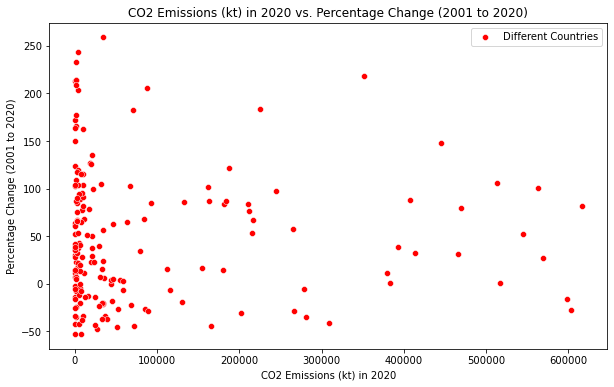

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=datax, x="2020", y="Change", label="Different Countries", color='red')
plt.xlabel("CO2 Emissions (kt) in 2020")
plt.ylabel("Percentage Change (2001 to 2020)")
plt.title("CO2 Emissions (kt) in 2020 vs. Percentage Change (2001 to 2020)")
plt.show()

In [46]:
def one_silhouette(xy, n):
    """Calculates silhouette score for n clusters"""
    kmeans = KMeans(n_clusters=n, n_init=20)
    kmeans.fit(xy)
    labels = kmeans.labels_
    score = skmet.silhouette_score(xy, labels)
    return score

In [48]:
scaler = pp.RobustScaler()
x_norm = scaler.fit(datax[["2020", "Change"]]).transform(datax[["2020", "Change"]])

In [49]:
silhouette_scores = []

for i in range(2, 12):
    score = one_silhouette(x_norm, i)
    silhouette_scores.append(score)
    print(f"The silhouette score for {i: 3d} is {score: 7.4f}")

The silhouette score for   2 is  0.7121
The silhouette score for   3 is  0.5742
The silhouette score for   4 is  0.5130
The silhouette score for   5 is  0.5026
The silhouette score for   6 is  0.4517
The silhouette score for   7 is  0.4485
The silhouette score for   8 is  0.4265
The silhouette score for   9 is  0.4262
The silhouette score for  10 is  0.4213
The silhouette score for  11 is  0.4111


In [50]:
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(x_norm)
labels = kmeans.labels_
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
xkmeans, ykmeans = centroids[:, 0], centroids[:, 1]

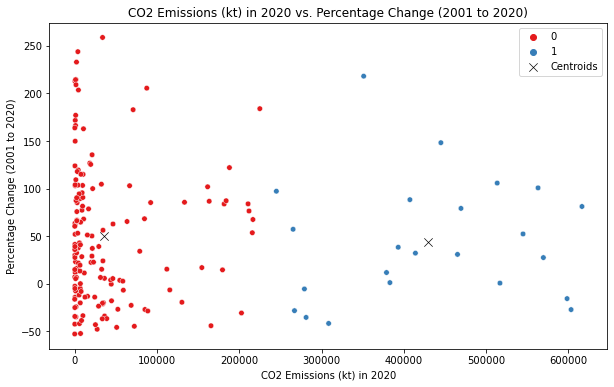

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=datax["2020"], y=datax["Change"], hue=labels, palette="Set1", s=30)
sns.scatterplot(x=xkmeans, y=ykmeans, color="black", s=70, label='Centroids', marker="x")
plt.xlabel("CO2 Emissions (kt) in 2020")
plt.ylabel("Percentage Change (2001 to 2020)")
plt.title("CO2 Emissions (kt) in 2020 vs. Percentage Change (2001 to 2020)")
plt.show()

In [66]:
uk = dfT.loc['2000':'2022', ['United Kingdom']].reset_index()
uk = uk.rename(columns={'index': 'Year', 'United Kingdom': 'CO2 Emissions'})
uk = uk.apply(pd.to_numeric, errors='coerce')
uk = uk.dropna(subset=['CO2 Emissions']).replace([np.inf, -np.inf], np.nan).dropna()
uk.describe()

Country Name,Year,CO2 Emissions
count,21.000000,21.000000
mean,2010.000000,462813.580952
std,6.204837,77168.170053
min,2000.000000,308650.300000
25%,2005.000000,401075.300000
50%,2010.000000,467831.000000
75%,2015.000000,530888.200000
max,2020.000000,545262.200000


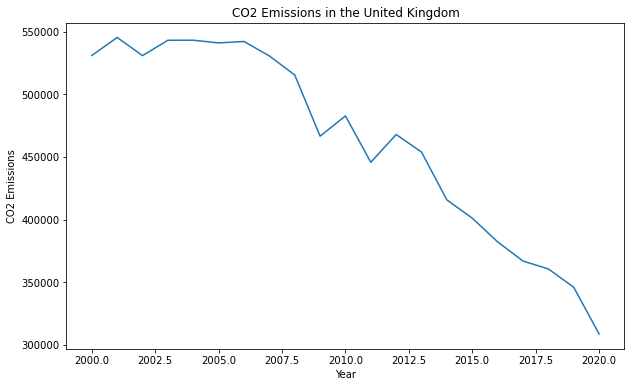

In [67]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=uk, x='Year', y='CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions in the United Kingdom')
plt.show()

In [68]:
def poly(x, a, b, c, d, e):
    """ Calulates polynominal"""
    x = x - 2001
    f = a + b*x + c*x**2 + d*x**3 + e*x**4
    return f

In [69]:
param, covar = opt.curve_fit(poly, uk["Year"], uk["CO2 Emissions"])
sigma = np.sqrt(np.diag(covar))
year = np.arange(2001, 2031)
forecast = poly(year, *param)
sigma = errors.error_prop(year, poly, param, covar)
low = forecast - sigma
up = forecast + sigma
uk["fit"] = poly(uk["Year"], *param)

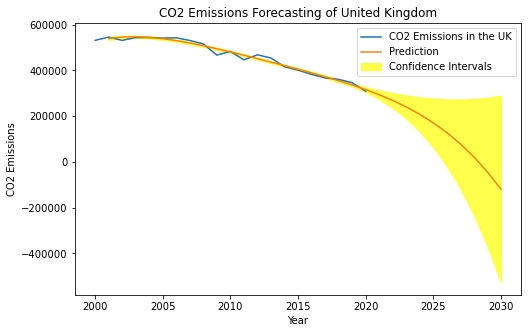

In [73]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=uk, x='Year', y='CO2 Emissions', label="CO2 Emissions in the UK")
sns.lineplot(x=year, y=forecast, label="Prediction")
plt.fill_between(year, low, up, color="yellow", alpha=0.7, label="Confidence Intervals")
plt.title("CO2 Emissions Forecasting of United Kingdom")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions")
plt.legend()
plt.show()